In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv(r'C:\Users\Zenbook\Downloads\Diabetes_XTrain.csv')
dfy=pd.read_csv(r'C:\Users\Zenbook\Downloads\Diabetes_YTrain.csv')
dfx_test=pd.read_csv(r'C:\Users\Zenbook\Downloads\Diabetes_Xtest.csv')
print(dfx)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              7      168             88             42      321  38.2   
1              8      110             76              0        0  27.8   
2              7      147             76              0        0  39.4   
3              2      100             66             20       90  32.9   
4              4      129             86             20      270  35.1   
..           ...      ...            ...            ...      ...   ...   
571            2      111             60              0        0  26.2   
572            7      187             68             39      304  37.7   
573            2      122             60             18      106  29.8   
574            4      154             72             29      126  31.3   
575            1       88             78             29       76  32.0   

     DiabetesPedigreeFunction  Age  
0                       0.787   40  
1                       0.237   58  


In [3]:
x_test=dfx_test.values
x=dfx.values
y=dfy.values
y=y.reshape((-1,))
print(x)

[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]]


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
[495, 573, 547, 405, 298, 567, 576, 576]


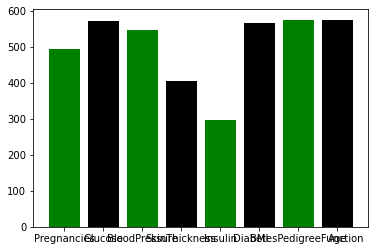

In [4]:
number=dfx.columns
print(dfx.columns)
n=number.nunique()
dfx[number]=dfx[number].replace(0,np.NaN)
barg=[]
for i in range(n):
    sol=dfx[number[i]].value_counts()
    sol=np.array(sol)
    s=np.sum(sol)
    barg.append(s)
print(barg) 
l1=[1,2,3,4,5,6,7,8]
l=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.bar(l1,barg,tick_label=l,width=0.8,color=['green','black'])
plt.show()

In [5]:
def distance(t1,t2):
    return np.sqrt(sum(t1-t2)**2)

def knn(x,y,querypoint,k=5):
    val=[]
    for i in range(x.shape[0]):
        d=distance(querypoint,x[i])
        val.append((d,y[i]))
    val=sorted(val)
    val=np.array(val)
    val=val[:k]
    #print(val)
    new_val=np.unique(val[:,1],return_counts=True)
    index=new_val[1].argmax()
    pred=new_val[0][index]
    #print(new_val)
    return pred

In [9]:
m=x_test.shape[0]
ans=[]
for j in range(m):
    pr=int(knn(x,y,x_test[j]))
    ans.append(pr)
    
print(ans)

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
